In [3]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

for $0<t<t_0$:

$
N_2(t) = N_{Mot} \Gamma_{exc} t
$

$
N_1(t) = 0
$

for $t>t_0$:

$
N_2(t) = N_{Mot} \Gamma_{exc} \Gamma{ry} t_0 e^{-\Gamma_{ry}(t-t_0)}
$

$
N_1(t) = \frac{N_{Mot} \Gamma_{exc} \Gamma{ry} t_0}{\Gamma_{6p}-\Gamma{ry}}(e^{-\Gamma_{ry}(t-t_0)}-e^{-\Gamma_{6p}(t-t_0)})
$


i don't implement them yet

In [2]:
def N2(t, Gamma_ry, N_Mot, Gamma_exc): return (1-np.exp(-Gamma_ry*t))*N_Mot*Gamma_exc/Gamma_ry

def N1(t, Gamma_ry, N_Mot, Gamma_exc, Gamma_6p): return N_Mot*Gamma_exc*np.exp(-Gamma_6p*t)*((1/Gamma_6p)*(1-np.exp(-Gamma_6p*t))-(1/(Gamma_ry+Gamma_6p))*(1-np.exp(-(Gamma_ry+Gamma_6p)*t)))

In [44]:
Gamma_ry_range = np.arange(0.00001,0.3,0.001)
N6p = []
N70s = []

N_Mot = 10000
Gamma_exc = 0.1/N_Mot
Gamma_ry = 0.1
Gamma_6p = 8
C1 = -Gamma_exc*N_Mot/Gamma_ry

for Gamma_ry in Gamma_ry_range:
    F = lambda t, s: np.dot(np.array([[-Gamma_ry, Gamma_ry], [Gamma_ry, -(Gamma_6p+Gamma_ry)]]), s)#+np.array([N_Mot*Gamma_exc, 0])

    t_eval = np.arange(0,6, 0.01)
    sol = solve_ivp(F, [0, 6], [5, 0], t_eval=t_eval)

    N6p.append(sol.y.T[-1, 1])
    N70s.append(sol.y.T[-1, 0])

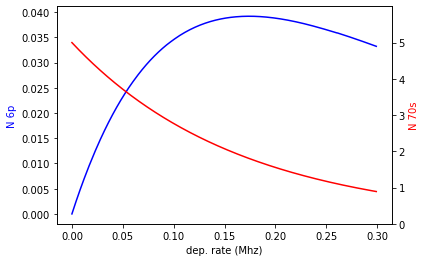

In [45]:
fig, ax1 = plt.subplots()

ax1.plot(Gamma_ry_range, N6p, label="N_6p", color="b")
ax1.set_ylabel('N 6p', color="b")

ax2 = ax1.twinx() 


ax2.plot(Gamma_ry_range, N70s, label="N_ry", color="r")
ax2.set_ylabel('N 70s', color="r")
ax2.set_ylim([0,max(N70s)+1])

ax1.set_xlabel("dep. rate (Mhz)")

plt.show()

In [41]:
0.18/5

0.036